In [1]:
import random
import pandas as pd
import requests
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

## Базовые понятия теории вероятностей

### Вероятность события
Если все исходы равновероятны, вероятность события A — это отношение m/n, где m — количество исходов, входящих в событие, а n — общее количество элементарных исходов в вероятностном пространстве.

- **Элементарный исход** — неделимый, то есть не состоящий из нескольких исходов, возможный результат эксперимента. Если бросить кубик с пронумерованными от одного до шести гранями, элементарным исходом такого эксперимента будет любое число из этого ряда: 1,2,3,4,5,6.
- **Вероятностное пространство** — множество всех возможных элементарных исходов. В математике множество обозначают фигурными скобками, внутри которых перечисляют его элементы. В примере с кубиком множество такое: {1,2,3,4,5,6}.
- **Событие** — любое подмножество вероятностного пространства. Например, событие «На кубике выпало чётное число» объединяет такие исходы: «Выпало два», «Выпало четыре» и «Выпало шесть».
- **Честный эксперимент** — эксперимент, в котором все исходы равновероятны. Вероятность исхода в честном эксперименте равна 1/n, где n — общее количество исходов. Равная вероятность упасть на любую грань есть у честного кубика или честной монеты.


#### Задача 1.

Светлана хочет стать дизайнером и записалась на шесть онлайн-курсов, среди них — курс "Инструменты дизайнера". Но выходных всего два, и один нужно посвятить просмотру любимого сериала. Для выбора курса Светлана кидает честный кубик, а чтобы выбрать субботу или воскресенье — честную монетку. С какой вероятностью по воскресеньям Светлана будет изучать курс "Инструменты дизайнера"?

In [ ]:
courses = [f'course_{c}' for c in range(6)]
days = [6, 7]
i = 0
for course in courses:
    for d in days:
        i += 1
        print(i, course, d)

In [ ]:
1/12

#### Задача 2.

Онлайн-магазин запустил акцию «Рандомакция». Покупатель нажимает кнопку и с равной вероятностью получает скидку 10, 20, 30, 40 или 50 процентов. Два клиента нажали кнопку. Какова вероятность, что хотя бы один из них получил скидку 10%?

In [ ]:
consumer_0_discounts = range(10, 51, 10)
consumer_1_discounts = range(10, 51, 10)
i = 0
for consumer_0_discount in consumer_0_discounts:
    for consumer_1_discount in consumer_1_discounts:
        i += 1
        print(i, consumer_0_discount, consumer_1_discount)

In [ ]:
9/25

### Независимые события

Главное, что нужно знать о независимых событиях, — вероятность одновременного наступления нескольких независимых событий равна произведению их вероятностей. Одновременное наступление означает, что исход эксперимента лежит в их пересечении. И даже если они происходят не в один момент времени, к концу эксперимента все события произойдут.
Термины, которые помогут разобраться в теме:
- Два события называются **независимыми**, если наступление одного из них не влияет на вероятность наступления другого.
  Например, при игре в рулетку вероятность, что шарик окажется в чёрном секторе, не зависит от того, какой сектор выпадал предыдущие сто раз. Даже если все сто раз выпало красное. То есть вероятность последующего события не зависит от предыдущего. Незнание этого принципа приводит к «ошибке игрока»: предположению, что у рулетки есть память.
- События **зависимые**, если наступление одного события меняет вероятность наступления другого.
  Например, если эксперимент состоит из выбора парка, а потом поиска в нём желудей, то выбор дубового парка существенно повысит вероятность нахождения жёлудя.

#### Задача 3.

Одноклассники пошли поле уроков в тир. Леша обрадовался, поскольку он ходит в кружок метких стрелков, и у него появился реальный шанс обрадовать свою подружку Катерину и выиграть для нее самую большую игрушку. Но для этого надо попасть в цель подряд 10 раз. Какова вероятность, что Леша порадует Катерину, если он попадает в цель с вероятностью 95%, а его выстрелы друг от друга не зависят.

In [ ]:
0.95 ** 10

### Противоположные события  

Некоторые события исключают другие: хорошая оценка - плохая оценка, сейчас выходной - сейчас будний день. 
Если событие произошло, то одновременно не может случиться противоположное.  
**Противоположное событие** (не A) — множество всех элементарных исходов, которые не входят в событие A. Часто его ещё называют дополняющим событием, реже — комплементарным или обратным.  
Противоположное событие включает всё остальное вероятностное пространство. Поэтому для него справедлива формула: P(не А) = 1 - P(А).

#### Задача 4.

В корзине лежит 4 белых шара и 6 черных. Мы, не глядя, достаем шар, смотрим его цвет, кладем обратно и снова достаем какой-то шар. Какова вероятность, что хотя бы раз мы достали белый шар?

In [ ]:
1 - (6 / (6 + 4)) * (6 / (6 + 4))

#### Задача 5.
Онлайн газета показывает пользователям статьи, в конце которых размещает рекламу. Если пользователь открыл статью, то дочитает её до конца с вероятностью 0.6.  
Пользователь открыл десять статей. Какова вероятность того, что он дочитает не менее одной и не более девяти статей?

In [ ]:
1 - ((1 - 0.6) ** 9)

#### Задача 6.

Какова вероятность того, что в группе из 23 человек найдется хотя бы два человека, у которых дни рождения (число и месяц) полностью совпадают?

In [ ]:
res = 1
for i in range(2, 24):
    res *= (1 - (i - 1) / 365)
1 - res

### Случайная величина

**Случайная величина** — переменная, значения которой представляют собой численные исходы некоторого случайного феномена или эксперимента.

Сумма значений на двух игральных костях — случайная величина.  
Построим для нее распределение вероятностей, учитывая закон больших чисел: чем больше раз повторяется эксперимент, тем ближе относительная частота заданного на этом эксперименте события будет к вероятности этого события. 

In [2]:
res = []
for i in range(1, 7):
    for j in range(1, 7):
        res.append([i, j, i + j])
res_pd = pd.DataFrame(res, columns=['first_cube', 'second_cube', 'sum'])
res_pd

,first_cube,second_cube,sum
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6
5,1,6,7
6,2,1,3
7,2,2,4
8,2,3,5
9,2,4,6


In [3]:
res_pd['sum'].value_counts().sort_index()

2     1
3     2
4     3
5     4
6     5
7     6
8     5
9     4
10    3
11    2
12    1
Name: sum, dtype: int64

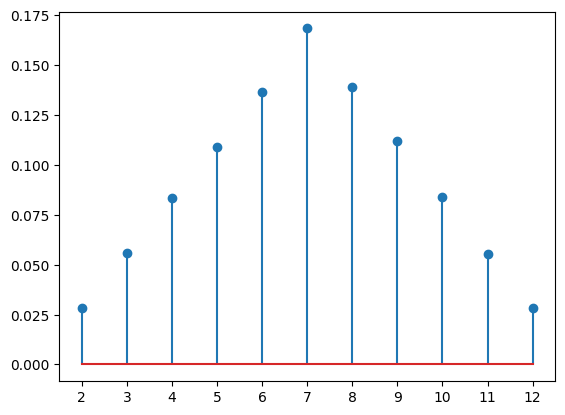

In [7]:
res = []
for i in range(100000):
    cube_1 = random.randint(1, 6)
    cube_2 = random.randint(1, 6)

    cubes_sum = cube_1 + cube_2

    res.append(cubes_sum)

res = pd.Series(res)
plt.stem(res.value_counts(normalize=True).sort_index())
plt.xticks(range(res.nunique()), sorted(res.unique()))
plt.show()

### Математическое ожидание и дисперсия

**Математическое ожидание** случайной величины — сумма всех значений случайной величины, помноженных на их вероятности. Оно показывает, вокруг какого значения распределена случайная величина, и — по закону больших чисел — к какому значению она будет в среднем стремиться при повторениях эксперимента. 
Посчитаем матожидание для суммы значений на кубиках.

In [10]:
def E(x):
    return x.value_counts(normalize=True).reset_index().apply(lambda f: f['index'] * f[0], axis=1).sum()

In [11]:
E(res)

7.007569999999999

In [12]:
res.mean()

7.00757

**Дисперсия** - мера разброса математического ожидания. 
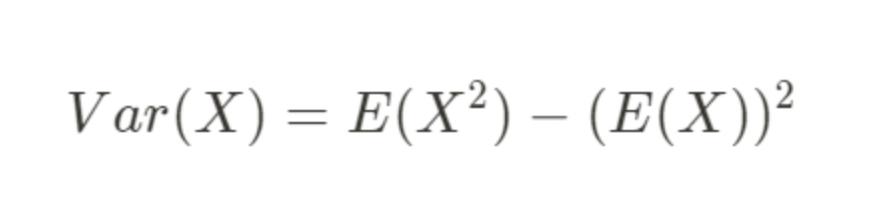  
Рассчитаем ее для суммы значений на двух кубиках

In [13]:
E(res**2) - (E(res))**2

5.859812695100004

Воспользуемся встроенным методом и сравним результаты

In [14]:
res.var()

5.8598712938129385

### Правило трех сигм
При нормальном распределении 68 процентов случайных значений лежат в пределах одного стандартного отклонения от среднего, 95 процентов — в пределах двух стандартных отклонений, и 99,7 процентов — в пределах трех стандартных отклонений.

In [15]:
sigm = res.var() ** (1/2)
expect = E(res)
for i in range(1, 4):
    print(i, res.apply(lambda x: expect - i * sigm < x < expect + i * sigm).mean())

1 0.66484
2 0.94347
3 1.0


### Биномиальное распределениe

Представим, что мы играем на набережной в игру, где нужно дротиком попасть в надувной шарик. Вероятность попадания _p_ равна 10%. Бросок дротика — это случайный эксперимент. Попадание в шарик — это случайная величина, распределенная по распределению Бернулли. Построим для нее рапределение вероятностей. Рассчитаем математическое ожидание (_p_) и дисперсию (_pq_) по формулам и с помощью встроенных функций.

In [20]:
p = 0.1
q = 1 - p

res = []
for i in range(10000):
    res.append(random.choices([1, 0], weights=[p, q])[0])
res = pd.Series(res)

res.value_counts()

0    8999
1    1001
dtype: int64

In [21]:
res.value_counts(normalize=True)

0    0.8999
1    0.1001
dtype: float64

In [22]:
res.var()

0.09008899889988999

In [23]:
p*q

0.09000000000000001

Представим теперь, что мы кидaем дротик несколько раз подряд. Количество попаданий из этих нескольких раз — случайная величина, распределенная биномиально. Построим для нее рапределение вероятностей. Рассчитаем математическое ожидание (_np_) и дисперсию (_npq_) по формулам и с помощью встроенных функций.

In [24]:
p = 0.1
q = 1 - p
n = 10

res = []
for i in range(10000):
    res_here = []
    for j in range(n):
        res_here.append(random.choices([1, 0], weights=[p, q])[0])
    res.append(sum(res_here))
res = pd.Series(res)

res.value_counts()

1    3902
0    3466
2    1936
3     571
4     108
5      15
6       2
dtype: int64

<AxesSubplot:>

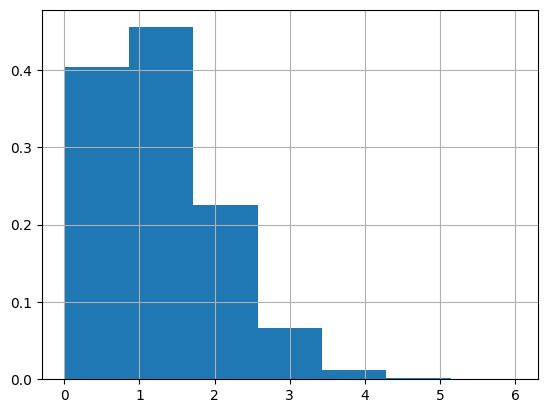

In [25]:
res.hist(bins=7, density=True)

In [26]:
n*p

1.0

In [27]:
res.mean()

1.0006

In [28]:
n*p*q

0.9

In [29]:
res.var()

0.8948891289128913

### Нормальное распределение

Получим данные о росте и весе людей 18 лет из датасета по [ссылке](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset).

In [30]:
data = pd.read_csv('SOCR-HeightWeight.csv')
data['Height(cm)'] = data['Height(Inches)'] * 2.54
data['Weight(kg)'] = data['Weight(Pounds)'] * 0.4536

<AxesSubplot:>

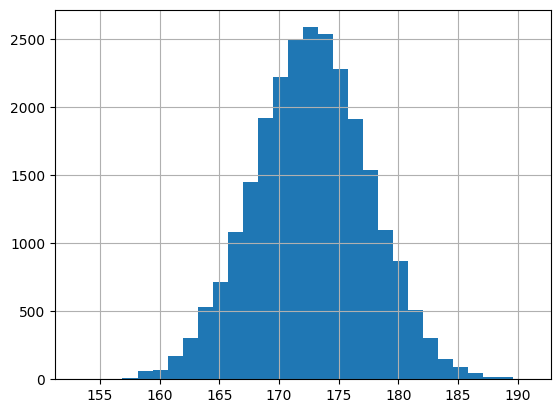

In [31]:
data['Height(cm)'].hist(bins=30)

Сгенерируем случайные величины, распределенные нормально для моделирования наших показателей

In [32]:
height_exp = []
mean_height = data['Height(cm)'].mean()
heigth_sigm = data['Height(cm)'].std()
for i in range(data.shape[0]):
    height_exp.append(random.normalvariate(mu=mean_height, sigma=heigth_sigm))
height_exp = pd.Series(height_exp)

<AxesSubplot:>

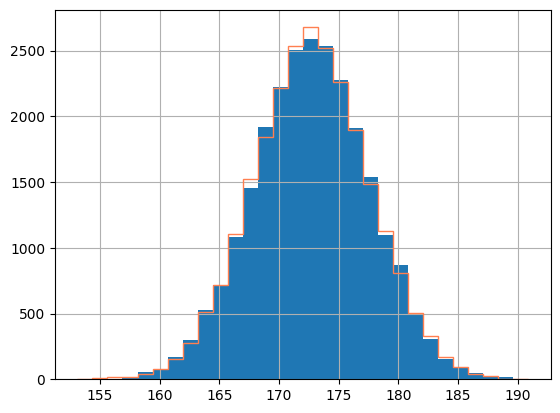

In [33]:
height_range = [data['Height(cm)'].min(), data['Height(cm)'].max()]

data['Height(cm)'].hist(bins=30, range=height_range)
height_exp.hist(bins=30, histtype='step', color='coral', range=height_range)

Сгенерируем переменную, отвечающую за нормальное распределение с интересующими параметрами, и визуализируем распределение через нее

In [34]:
height_distr = st.norm(mean_height, heigth_sigm)
height_exp_2 = height_distr.rvs(size=data.shape[0])
height_exp_2 = pd.Series(height_exp_2)

<AxesSubplot:>

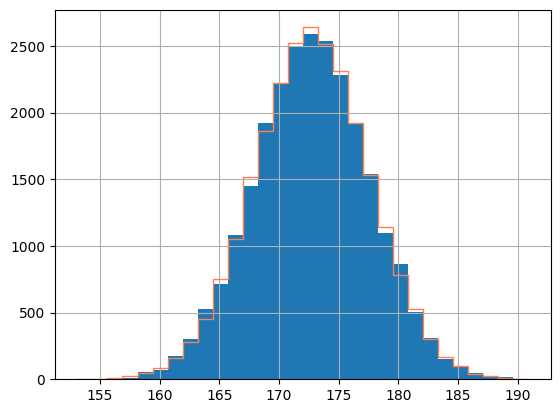

In [35]:
data['Height(cm)'].hist(bins=30, range=height_range)
height_exp_2.hist(bins=30, histtype='step', color='coral', range=height_range)

Чтобы найти вероятность попадания значений в те или иные интервалы, понадобятся два метода: ppf() и cdf(). 
Буквы расшифровываются так:
- ppf — от англ. percent point function, «функция процентных значений»;
- cdf — от англ. cumulative distribution function, «кумулятивная функция распределения».

Оценим вероятность того, что рост будет превышать 180 см.

In [36]:
1 - height_distr.cdf(180)

0.06542159381416912

Какой минимальный рост среди самых высоких 6.5% населения?

In [38]:
height_distr.ppf(1 - 0.065)

180.01602049537695

### Аппроксимация биномиального распределения нормальным

<StemContainer object of 3 artists>

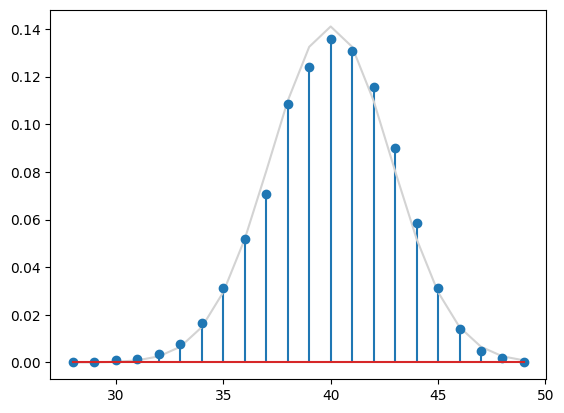

In [39]:
shape = 10000

# биномиальное распределение
p = 0.8
n = 50

binom = pd.Series(st.binom(n=n, p=p).rvs(size=shape)).value_counts(normalize=True).sort_index()

# нормальное распределение
mu = n * p
var = n * p * (1 - p)
sigma = np.sqrt(var)

norm = st.norm.pdf(binom.index, mu, sigma)

x = range(25, n + 1)

plt.plot(binom.index, norm, color='lightgrey')
plt.stem(binom.index, binom)